<a href="https://colab.research.google.com/github/manuelarangom/Twitter_Mention_Analyzer/blob/master/Twitter_Listening_%5Bv1_1_1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#v1.1.1
Se añade la función *detector* de la librería *gender_guesser* para incluír columna en dataframe con el género del autor del tweet.

Además, se incluye gráfica que permite conocer laproporción por género y el exporte en excel de las menciones.


In [1]:
pip install gender_guesser

     |████████████████████████████████| 389kB 5.2MB/s 


In [0]:
import tweepy
import json
import re
import io
import nltk
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import OrderedDict
import gender_guesser.detector as gender

####### IA
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [0]:
nltk.download('vader_lexicon')

In [0]:
api_key = 'KY1rmARrX6885nePhnLZgseRh'
api_secret_key = 'xIn4ORXUn1TiMYmcHaP9iHfPaM7by8bPzCZB6QueqrcCXc1q2A'
access_token = '355832226-IoY0CpTyUv57vzTc6lsxY9Olq3ZbA7NjqlNbqRd2'
access_token_secret = '5rWjm7s4vGBVwq2erLLONSCoOpsiANr1AHUgycG0ruXED'

auth = tweepy.OAuthHandler(api_key,api_secret_key)
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [4]:
stopwords = files.upload()
stopwords = pd.read_csv(io.BytesIO(stopwords.get('stopwords.csv')), encoding = "ISO-8859-1")

Saving stopwords.csv to stopwords.csv


In [0]:
###### BUSCAR SEGUIDORES DE UNA CUENTA

data = api.followers("julioprofenet")

for f in data:
  print(json.dumps(f._json, indent = 2))

In [0]:
###### BUSCAR TWEETS POR PALABRAS CLAVE

def mentions_by_keywords(key_word):

  word = key_word.lower()

  data = pd.DataFrame()

  for t in tweepy.Cursor(api.search, tweet_mode = 'extended', q = word, lang = "es", geocode = "6.254301,-75.577237,17km").items(100):   #geocode = "6.254301,-75.577237,17km"

    data = data.append(other=t._json, ignore_index=True)

  g = gender.Detector(case_sensitive = False)
  query_results = pd.DataFrame( columns = ['MentionID','User_Name','Screen_Name','Gender','Content'] )
  for m in range(0,len(data)):

  # Determinar Género del Usuario
    user_gender = g.get_gender((re.sub('[^A-Za-z0-9]+','',data['user'][m]['name'].split()[0])))
  # Añadir items al DataFrame
    query_results.loc[m] = [ data['id_str'][m],data['user'][m]['name'],data['user'][m]['screen_name'],user_gender,data['full_text'][m][0:] ]

  key_word = key_word

  return query_results

In [21]:
tweets = mentions_by_keywords(input())
tweets

Rolo


,MentionID,User_Name,Screen_Name,Gender,Content
0,1241468794087919618,Garni,slash_rolo,unknown,"RT @ElMismoCabe: Ah no neas, si ese virus le e..."
1,1241468300783206401,Ale.,Alemrq2,male,Primera vez que envidio a un rolo.
2,1241455122338795520,Angelo Andres,rolo_08,male,RT @QuinteroCalle: Confirmo que la primera per...
3,1241384880543498240,Garni,slash_rolo,unknown,"RT @DigameProfesor: No puedo, se juega la Prim..."
4,1241261914493259776,Mr Jones,MrSuarez___,unknown,No puedo creer que vi el vídeo de la divaza ma...
...,...,...,...,...,...
87,1238674846269108224,𝑉𝑎𝑙𝑒𝑟𝑖𝑎⁷|🇨🇴,_v4leriaj5,unknown,@ATZ_BNG_STZ @globalvane El rolo si se diferen...
88,1238653844143460352,Camilo Pena,CamiloPena9,male,"Aunque soy rolo y amo Bogotá, debo advertirles..."
89,1238633278791352321,duk🤡,tulua1500900,andy,@MoritePiroba jajajajajaja mk un rolo mutiló a...
90,1238624851759226884,Luz Vel,mateohoyosutpe1,mostly_female,@Rolo_JP @intiasprilla @IvanDuque Él no es el ...


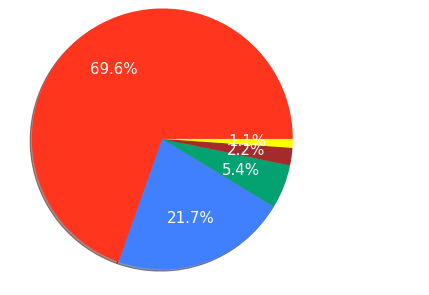

In [22]:
gender_count = {}
gender_list = tweets['Gender'].unique()

textprops = {  
    'color' : '#FFFFFF',
    'size': '15'
}

for g in gender_list:
  gender_count[g] = len(tweets[ tweets['Gender'] == g ])


plt.pie(gender_count.values(), explode=None, labels=gender_count.keys(),
        colors=['#FF351D','#4080FF','#04A270','brown','yellow','gray','pink'],
        autopct='%1.1f%%', pctdistance=0.65, shadow=True, labeldistance=1.15, startangle=0,
        radius=1.5, counterclock=True, wedgeprops=None, textprops=textprops, center=(0,0),
        frame=False, rotatelabels=False, data=None)

plt.show()

In [0]:
# GUARDAR EXCEL
tweets.to_excel('tweets_about_Aguacate.xlsx', index = True)

In [0]:
# SEPARAR COMENTARIOS POR HOMBRE / MUJER
male_comments = tweets[ tweets['Gender'] == 'male' ]
female_comments = tweets[ tweets['Gender'] == 'female' ]

In [0]:
male_comments.head(100)

In [0]:
words = ' '.join(male_comments['Content'])
cleaned_word_m = " ".join([word.lower() for word in words.split()
                        if 'http' not in word
                            and not word.startswith('@')
                            and not word.startswith('#')
                            and word != 'hotmail'
                            and word != 'gmail'

                        ])

wordcloud = WordCloud(stopwords = stopwords['a'],
                  background_color='#000000',
                  width=1000,
                  height=1000
                  ).generate(cleaned_word_m)


plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

######
www = []
words = ' '.join(female_comments['Content'])
cleaned_word_f = " ".join([word.lower() for word in words.split()
                        if 'http' not in word
                            and not word.startswith('@')
                            and not word.startswith('#')
                            and not word.startswith('RT')
                            and word != 'hotmail'
                            and word != 'gmail'

                        ])

wordcloud = WordCloud(stopwords = stopwords['a'],
                  background_color='#FFFFFF',
                  width=1000,
                  height=1000
                  ).generate(cleaned_word_f)

plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [0]:
cleaned_word_f

In [0]:
prueba = {}

for i in cleaned_word_m.split():

  if i in prueba:
    prueba[i] += 1
  else:
    prueba[i] = 1

prueba_desc = OrderedDict(sorted(prueba.items(), key = lambda kv: kv[1], reverse = True))

In [0]:
female_text = female_comments['Content']
male_text = male_comments['Content']

In [41]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores('')3

{'compound': -0.5859, 'neg': 0.444, 'neu': 0.374, 'pos': 0.182}